In [27]:
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy import interpolate
from tqdm import tqdm

In [2]:
igm_database = hp.File('IGMspec_DB_v02.hdf5','r')

### The structure of the IgmSpec database from
https://arxiv.org/pdf/1703.04695.pdf is:

<img src='igmspec_structure.png'>

and the datasets contained in the file are:

<img src = 'datasets.png' width = 500>

In [6]:
dataset1 = igm_database['XQ-100']
dataset1_meta = dataset1['meta']
dataset1_spec = dataset1['spec']
dataset1_spec_wave = dataset1_spec['wave']
dataset1_spec_flux = dataset1_spec['flux']
dataset1_spec_1sig = dataset1_spec['sig']
dataset1_spec_continuum = dataset1_spec['co']

(b'000009.26+151754.5', 0.038604, 15.298477, 1.1974760293960571, 19.916, 0.042, 19.807, 0.036, 19.374, 0.017, 19.148, 0.023, 19.312, 0.069, 0.223, 20.551, -1.0, 0.0, 0.0, -9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, -25.101, 0.338, 0, 1, 1, 1, 1048578, 1, 0, 0, 0, 1, 0, 0, 1739, 51814, 52251, 751, 354, 40, 4, 303, 24, 1048578, 1, 0, 0, 0, 1, 0, 0, 19.912, 0.037, 19.77, 0.024, 19.393, 0.018, 19.173, 0.019, 19.353, 0.07, b'587727222487318552', b'211612125330669568', b' SDSS J000009.26+151754.5 ', b'2001-12-08', 2000.0, 2000.0, 0.0, b'SDSS-HW', b'QSO', 302259, b'spSpec-52251-0751-354.fit.gz', 3828, 3817.684194975445, 9215.098887349579, 2, b'SDSS', b'BOTH', b'SDSS 2.5-M')
0 3827


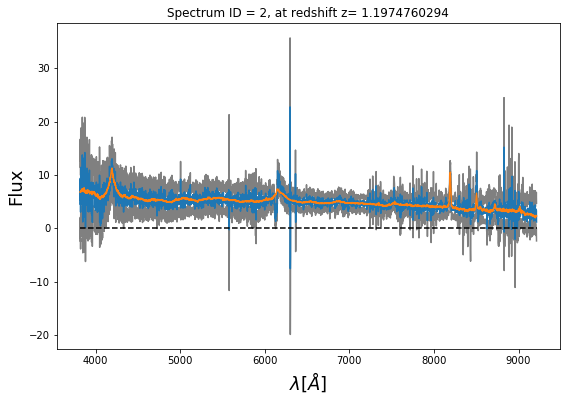

In [9]:
qid = 2
temp = dataset1_meta[qid]

ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-24803))
ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-3100))
if ll > ul:
    ll = 0
print(ll,ul)

fig = plt.figure(figsize=(9,6))
#plt.plot(dataset1_spec_wave[qid,0:],dataset1_spec_flux[qid,0:],)
plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul] + 3*dataset1_spec_1sig[qid,ll:ul],color='0.5')
plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul] - 3*dataset1_spec_1sig[qid,ll:ul],color='0.5')
plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul],)
plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_continuum[qid,ll:ul],)
plt.plot([dataset1_spec_wave[qid,ll],dataset1_spec_wave[qid,ul]],[0,0],'k--')
plt.xlabel(r'$\lambda [\AA]$',fontsize=18)
plt.ylabel('Flux',fontsize=18)
plt.title('Spectrum ID = '+str(qid)+', at redshift z= '+str(temp[4])+r'$\pm$'+str(temp[5]))
plt.show()




In [10]:
for qid in range(100):
    #print(np.amax(dataset1_spec_wave[qid,0:]))
    temp = dataset1_meta[qid]
    print('redshift z= '+str(temp[3]))
    

redshift z= 1.82382595539
redshift z= 1.83638298512
redshift z= 1.1974760294
redshift z= 2.23420000076
redshift z= 1.85300600529
redshift z= 0.460088998079
redshift z= 0.478334993124
redshift z= 1.43683302402
redshift z= 0.949563026428
redshift z= 1.84086203575
redshift z= 1.90128600597
redshift z= 1.85707294941
redshift z= 0.703154027462
redshift z= 1.25358700752
redshift z= 0.545239984989
redshift z= 0.987757980824
redshift z= 3.21468091011
redshift z= 0.92575097084
redshift z= 1.15997600555
redshift z= 0.768383979797
redshift z= 1.14651894569
redshift z= 1.8124409914
redshift z= 1.094596982
redshift z= 1.52593302727
redshift z= 1.21919798851
redshift z= 1.83303499222
redshift z= 2.1342279911
redshift z= 1.54155802727
redshift z= 1.31271994114
redshift z= 0.952534019947
redshift z= 2.18390703201
redshift z= 0.439456999302
redshift z= 1.43924605846
redshift z= 1.43727505207
redshift z= 3.76523590088
redshift z= 1.14057397842
redshift z= 2.64204597473
redshift z= 3.9712998867
redshift 

In [88]:
#wavelength_array = np.linspace(3100,24800,2171)
#transmission_array = np.linspace(0,1,1001)

# coarser versions:
wavelength_array = np.arange(3100,24800,100)
transmission_array = np.linspace(0,1,101)

igm_grid = np.zeros((len(wavelength_array),len(transmission_array)))

qid=1

temp = dataset1_meta[qid]

ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-24803))
ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-3100))
if ll > ul:
    ll = 0

tempwave = dataset1_spec_wave[qid,ll:ul]
tempflux = dataset1_spec_flux[qid,ll:ul]
tempcont = dataset1_spec_continuum[qid,ll:ul]

tempwave_disc = np.arange(tempwave[0],tempwave[-1],100)

ll_arr = np.argmin(np.abs(tempwave_disc[0]-wavelength_array))
ul_arr = np.argmin(np.abs(tempwave_disc[-1]-wavelength_array))

tck1 = interpolate.splrep(tempwave,tempflux)
tck2 = interpolate.splrep(tempwave,tempcont)

flux_disc = interpolate.splev(tempwave_disc,tck1,der=0)
cont_disc = interpolate.splev(tempwave_disc,tck2,der=0)

optical_depth = (cont_disc-flux_disc)/cont_disc
mask = optical_depth > 1
optical_depth[mask] = 1
mask = optical_depth < 0
optical_depth[mask] = 0
transmission = 1-optical_depth

for i in range(len(tempwave_disc)):
    blkid = np.argmin(np.abs(transmission_array - transmission[i]))
    igm_grid[ll_arr+i,blkid] = igm_grid[ll_arr+i,blkid]+1

In [93]:
#wavelength_array = np.linspace(3100,24800,2171)
#transmission_array = np.linspace(0,1,1001)

# coarser versions:
wavelength_array = np.arange(3100,24800,100)
transmission_array = np.linspace(0,1,11)

igm_grid = np.zeros((len(wavelength_array),len(transmission_array)))

for qid in range(87):

    temp = dataset1_meta[qid]

    ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-24803))
    ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-3100))
    if ll > ul:
        ll = 0

    tempwave = dataset1_spec_wave[qid,ll:ul]
    tempflux = dataset1_spec_flux[qid,ll:ul]
    tempcont = dataset1_spec_continuum[qid,ll:ul]

    tempwave_disc = np.arange(tempwave[0],tempwave[-1],100)

    ll_arr = np.argmin(np.abs(tempwave_disc[0]-wavelength_array))
    ul_arr = np.argmin(np.abs(tempwave_disc[-1]-wavelength_array))

    tck1 = interpolate.splrep(tempwave,tempflux)
    tck2 = interpolate.splrep(tempwave,tempcont)

    flux_disc = interpolate.splev(tempwave_disc,tck1,der=0)
    cont_disc = interpolate.splev(tempwave_disc,tck2,der=0)

    optical_depth = (cont_disc-flux_disc)/cont_disc
    mask = optical_depth > 1
    optical_depth[mask] = 1
    mask = optical_depth < 0
    optical_depth[mask] = 0
    transmission = 1-optical_depth

    for i in range(len(tempwave_disc)):
        blkid = np.argmin(np.abs(transmission_array - transmission[i]))
        igm_grid[ll_arr+i,blkid] = igm_grid[ll_arr+i,blkid]+1

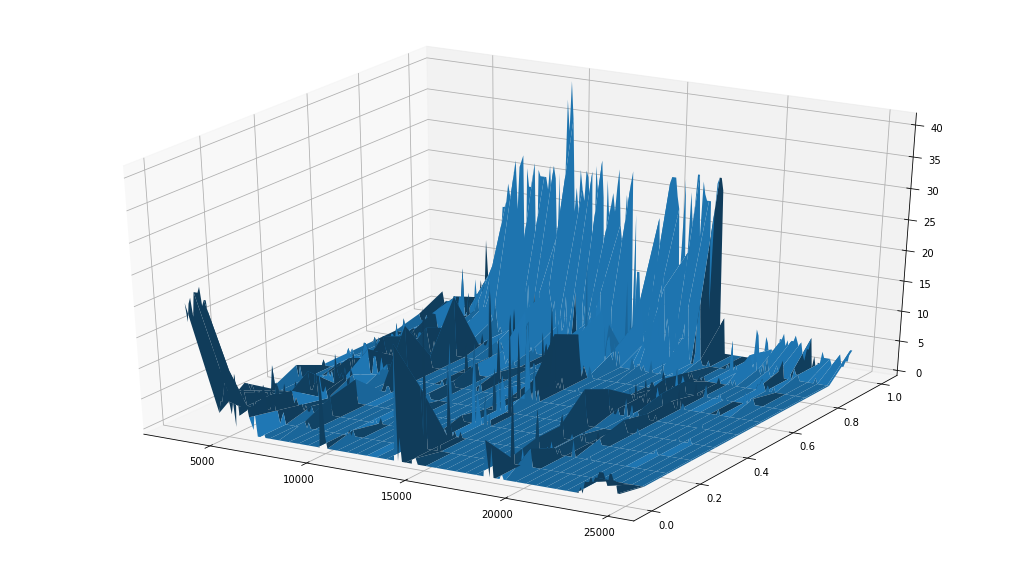

In [94]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111, projection='3d')

x,y = np.meshgrid(wavelength_array,transmission_array)
surf = ax.plot_surface(x,y,igm_grid.T)
#plt.xlabel('log t [lookback time]',fontsize=18)
#plt.ylabel(r'$\lambda [\AA]$ ',fontsize=18)
plt.show()

In [80]:
print(wavelength_array.shape,transmission_array.shape,igm_grid.shape)
x,y = np.meshgrid(wavelength_array,transmission_array)
print(x.shape,y.shape)


(2171,) (1001,) (2171, 1001)
(1001, 2171) (1001, 2171)


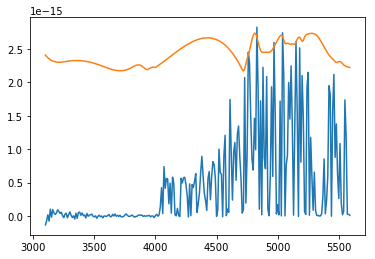

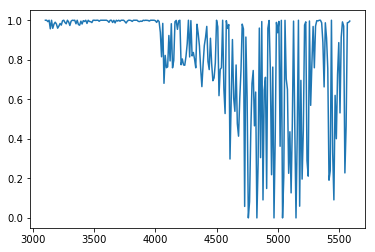

In [57]:
tck1 = interpolate.splrep(tempwave,tempflux)
tck2 = interpolate.splrep(tempwave,tempcont)

flux_disc = interpolate.splev(tempwave_disc,tck1,der=0)
cont_disc = interpolate.splev(tempwave_disc,tck2,der=0)

plt.plot(tempwave_disc,flux_disc)
plt.plot(tempwave_disc,cont_disc)
plt.show()

optical_depth = (cont_disc-flux_disc)/cont_disc
mask = optical_depth > 1
optical_depth[mask] = 1
mask = optical_depth < 0
optical_depth[mask] = 0
transmission = 1-optical_depth

plt.plot(tempwave_disc,optical_depth)
plt.show()

In [3]:
# try a new database
# 2QZ,ESI_DLA do not have continuum spectra

In [5]:
dataset1 = igm_database['SDSS_DR7']
dataset1_meta = dataset1['meta']
dataset1_spec = dataset1['spec']
dataset1_spec_wave = dataset1_spec['wave']
dataset1_spec_flux = dataset1_spec['flux']
dataset1_spec_1sig = dataset1_spec['sig']
dataset1_spec_continuum = dataset1_spec['co']

(b'000006.53+003055.2', 0.027228, 0.515341, 1.8238259553909302, 20.384, 0.065, 20.461, 0.034, 20.324, 0.038, 20.093, 0.041, 20.042, 0.121, 0.13, 20.508, 0.0, 0.0, 0.0, -9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0, -25.109, 0.091, 0, 0, 1, 0, 34603008, 0, 0, 0, 0, 1, 0, 0, 3325, 52522, 52203, 685, 467, 41, 5, 108, 118, 34603008, 0, 0, 0, 0, 1, 0, 0, 20.384, 0.065, 20.461, 0.034, 20.324, 0.038, 20.093, 0.041, 20.042, 0.121, b'588015509806252150', b'193034571183292416', b' SDSS J000006.53+003055.2 ', b'2001-10-21', 2000.0, 2000.0, 0.0, b'SDSS-HW', b'QSO', 302257, b'spSpec-52203-0685-467.fit.gz', 3843, 3803.6452032855573, 9212.977276685555, 0, b'SDSS', b'BOTH', b'SDSS 2.5-M')
0 3842


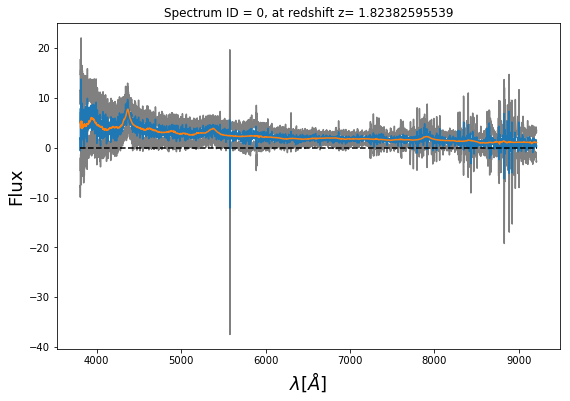

In [12]:
qid = 0
temp = dataset1_meta[qid]

print(temp)

ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-9266))
ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-3782))
if ll > ul:
    ll = 0
print(ll,ul)

fig = plt.figure(figsize=(9,6))
#plt.plot(dataset1_spec_wave[qid,0:],dataset1_spec_flux[qid,0:],)
plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul] + 3*dataset1_spec_1sig[qid,ll:ul],color='0.5')
plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul] - 3*dataset1_spec_1sig[qid,ll:ul],color='0.5')
plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_flux[qid,ll:ul],)
plt.plot(dataset1_spec_wave[qid,ll:ul],dataset1_spec_continuum[qid,ll:ul],)
plt.plot([dataset1_spec_wave[qid,ll],dataset1_spec_wave[qid,ul]],[0,0],'k--')
plt.xlabel(r'$\lambda [\AA]$',fontsize=18)
plt.ylabel('Flux',fontsize=18)
plt.title('Spectrum ID = '+str(qid)+', at redshift z= '+str(temp[3]))
plt.show()




In [14]:
for qid in range(100):
    #print(np.amax(dataset1_spec_wave[qid,0:]))
    temp = dataset1_meta[qid]
    print('redshift z= '+str(temp[3]))
    

redshift z= 1.82382595539
redshift z= 1.83638298512
redshift z= 1.1974760294
redshift z= 2.23420000076
redshift z= 1.85300600529
redshift z= 0.460088998079
redshift z= 0.478334993124
redshift z= 1.43683302402
redshift z= 0.949563026428
redshift z= 1.84086203575
redshift z= 1.90128600597
redshift z= 1.85707294941
redshift z= 0.703154027462
redshift z= 1.25358700752
redshift z= 0.545239984989
redshift z= 0.987757980824
redshift z= 3.21468091011
redshift z= 0.92575097084
redshift z= 1.15997600555
redshift z= 0.768383979797
redshift z= 1.14651894569
redshift z= 1.8124409914
redshift z= 1.094596982
redshift z= 1.52593302727
redshift z= 1.21919798851
redshift z= 1.83303499222
redshift z= 2.1342279911
redshift z= 1.54155802727
redshift z= 1.31271994114
redshift z= 0.952534019947
redshift z= 2.18390703201
redshift z= 0.439456999302
redshift z= 1.43924605846
redshift z= 1.43727505207
redshift z= 3.76523590088
redshift z= 1.14057397842
redshift z= 2.64204597473
redshift z= 3.9712998867
redshift 

In [40]:
np.power(10,np.linspace(-3,0,100))

array([ 0.001     ,  0.00107227,  0.00114976,  0.00123285,  0.00132194,
        0.00141747,  0.00151991,  0.00162975,  0.00174753,  0.00187382,
        0.00200923,  0.00215443,  0.00231013,  0.00247708,  0.00265609,
        0.00284804,  0.00305386,  0.00327455,  0.00351119,  0.00376494,
        0.00403702,  0.00432876,  0.00464159,  0.00497702,  0.0053367 ,
        0.00572237,  0.00613591,  0.00657933,  0.0070548 ,  0.00756463,
        0.00811131,  0.00869749,  0.00932603,  0.01      ,  0.01072267,
        0.01149757,  0.01232847,  0.01321941,  0.01417474,  0.01519911,
        0.01629751,  0.01747528,  0.01873817,  0.02009233,  0.02154435,
        0.0231013 ,  0.02477076,  0.02656088,  0.02848036,  0.03053856,
        0.03274549,  0.03511192,  0.03764936,  0.04037017,  0.04328761,
        0.04641589,  0.04977024,  0.05336699,  0.05722368,  0.06135907,
        0.06579332,  0.07054802,  0.07564633,  0.08111308,  0.0869749 ,
        0.09326033,  0.1       ,  0.10722672,  0.1149757 ,  0.12

In [68]:
#wavelength_array = np.linspace(3100,24800,2171)
#transmission_array = np.linspace(0,1,1001)

# coarser versions:
spacing = 10
wavelength_array = np.arange(3782,9266,spacing)
#transmission_array = np.linspace(0,1,101)
transmission_array = np.power(10,np.linspace(-3,0,100))

igm_grid = np.zeros((len(wavelength_array),len(transmission_array)))

ulim = 105783
z_em = np.zeros((ulim,))

counter = 0
for qid in tqdm(range(ulim)):

    temp = dataset1_meta[qid]
    z_em[qid] = temp[3]
    if temp[3] > 2.9 and temp[3] < 3.1:
        counter = counter+1

        ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-9266))
        ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-3782))
        if ll > ul:
            ll = 0

        tempwave = dataset1_spec_wave[qid,ll:ul]
        tempflux = dataset1_spec_flux[qid,ll:ul]
        tempcont = dataset1_spec_continuum[qid,ll:ul]

        tempwave_disc = np.arange(tempwave[0],tempwave[-1],spacing)

        ll_arr = np.argmin(np.abs(tempwave_disc[0]-wavelength_array))
        ul_arr = np.argmin(np.abs(tempwave_disc[-1]-wavelength_array))

        tck1 = interpolate.splrep(tempwave,tempflux)
        tck2 = interpolate.splrep(tempwave,tempcont)

        flux_disc = interpolate.splev(tempwave_disc,tck1,der=0)
        cont_disc = interpolate.splev(tempwave_disc,tck2,der=0)

        optical_depth = (cont_disc-flux_disc)/cont_disc
        mask = optical_depth > 1
        optical_depth[mask] = 1
        mask = optical_depth < 0
        optical_depth[mask] = 0
        transmission = 1-optical_depth

        for i in range(len(tempwave_disc)):
            blkid = np.argmin(np.abs(transmission_array - transmission[i]))
            igm_grid[ll_arr+i,blkid] = igm_grid[ll_arr+i,blkid]+1
            
print('sample at z=3 built from '+str(counter)+' sources')

100%|██████████| 105783/105783 [02:01<00:00, 871.09it/s]

sample at z=3 built from 2158 sources


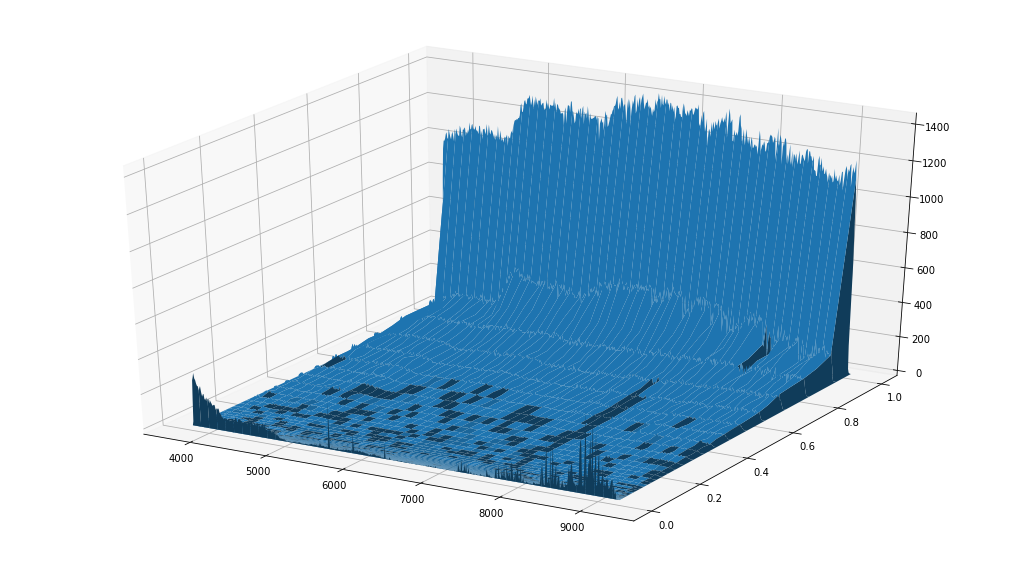

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111, projection='3d')

x,y = np.meshgrid(wavelength_array,transmission_array)
surf = ax.plot_surface(x,y,igm_grid.T)
#plt.xlabel('log t [lookback time]',fontsize=18)
#plt.ylabel(r'$\lambda [\AA]$ ',fontsize=18)
plt.show()


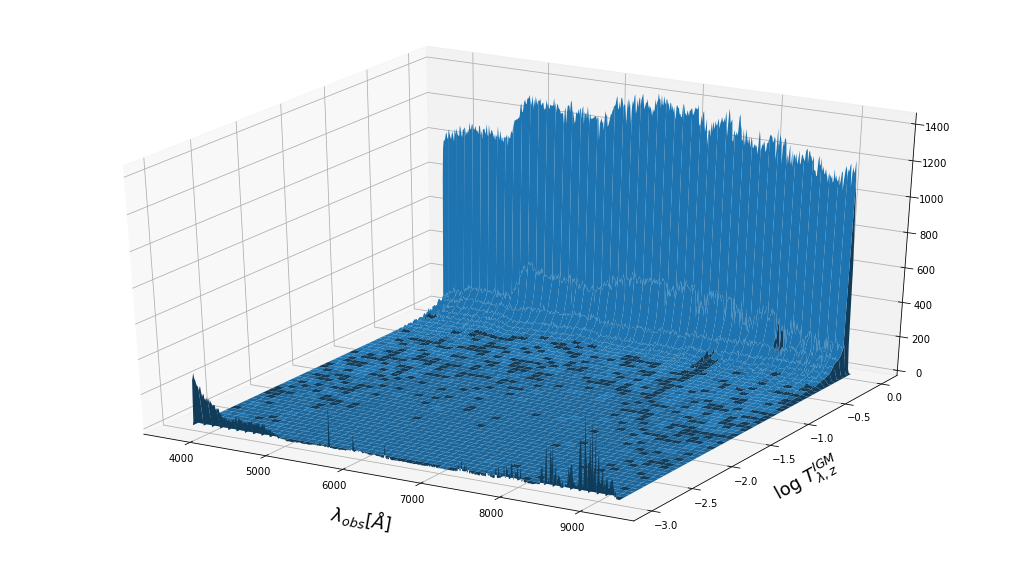

In [69]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111, projection='3d')

x,y = np.meshgrid(wavelength_array,np.log10(transmission_array))
surf = ax.plot_surface(x,y,igm_grid.T)
ax.set_ylabel('\n' +r'log $T^{IGM}_{\lambda,z}$ ',fontsize=18,linespacing=1.8)
ax.set_xlabel('\n' +r'$\lambda_{obs} [\AA]$ ',fontsize=18,linespacing=1.8)
plt.show()


In [70]:
#wavelength_array = np.linspace(3100,24800,2171)
#transmission_array = np.linspace(0,1,1001)

# coarser versions:
spacing = 10
wavelength_array = np.arange(3782,9266,spacing)
#transmission_array = np.linspace(0,1,101)
transmission_array = np.power(10,np.linspace(-3,0,100))

igm_grid = np.zeros((len(wavelength_array),len(transmission_array)))

ulim = 105783
z_em = np.zeros((ulim,))

counter = 0
for qid in tqdm(range(ulim)):

    temp = dataset1_meta[qid]
    z_em[qid] = temp[3]
    if temp[3] > 3.9 and temp[3] < 4.1:
        counter = counter+1

        ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-9266))
        ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-3782))
        if ll > ul:
            ll = 0

        tempwave = dataset1_spec_wave[qid,ll:ul]
        tempflux = dataset1_spec_flux[qid,ll:ul]
        tempcont = dataset1_spec_continuum[qid,ll:ul]

        tempwave_disc = np.arange(tempwave[0],tempwave[-1],spacing)

        ll_arr = np.argmin(np.abs(tempwave_disc[0]-wavelength_array))
        ul_arr = np.argmin(np.abs(tempwave_disc[-1]-wavelength_array))

        tck1 = interpolate.splrep(tempwave,tempflux)
        tck2 = interpolate.splrep(tempwave,tempcont)

        flux_disc = interpolate.splev(tempwave_disc,tck1,der=0)
        cont_disc = interpolate.splev(tempwave_disc,tck2,der=0)

        optical_depth = (cont_disc-flux_disc)/cont_disc
        mask = optical_depth > 1
        optical_depth[mask] = 1
        mask = optical_depth < 0
        optical_depth[mask] = 0
        transmission = 1-optical_depth

        for i in range(len(tempwave_disc)):
            blkid = np.argmin(np.abs(transmission_array - transmission[i]))
            igm_grid[ll_arr+i,blkid] = igm_grid[ll_arr+i,blkid]+1
            
print('sample at z=4 built from '+str(counter)+' sources')

100%|██████████| 105783/105783 [01:53<00:00, 931.18it/s] 

sample at z=4 built from 575 sources


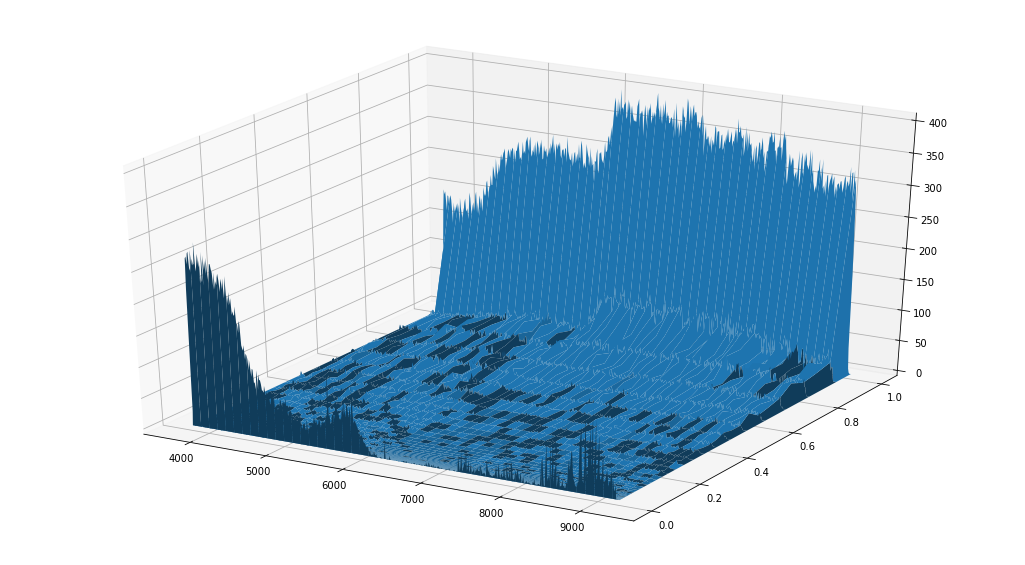

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111, projection='3d')

x,y = np.meshgrid(wavelength_array,np.log10(transmission_array))
surf = ax.plot_surface(x,y,igm_grid.T)
#plt.xlabel('log t [lookback time]',fontsize=18)
#plt.ylabel(r'$\lambda [\AA]$ ',fontsize=18)
plt.show()


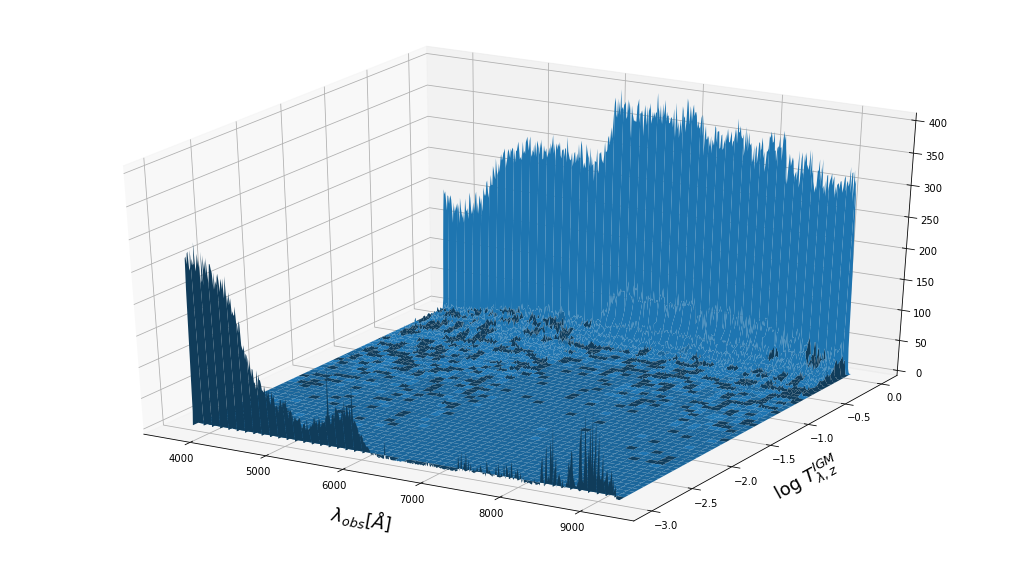

In [71]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111, projection='3d')

x,y = np.meshgrid(wavelength_array,np.log10(transmission_array))
surf = ax.plot_surface(x,y,igm_grid.T)
ax.set_ylabel('\n' +r'log $T^{IGM}_{\lambda,z}$ ',fontsize=18,linespacing=1.8)
ax.set_xlabel('\n' +r'$\lambda_{obs} [\AA]$ ',fontsize=18,linespacing=1.8)
plt.show()


In [74]:
#wavelength_array = np.linspace(3100,24800,2171)
#transmission_array = np.linspace(0,1,1001)

# coarser versions:
spacing = 10
wavelength_array = np.arange(3782,9266,spacing)
#transmission_array = np.linspace(0,1,101)
transmission_array = np.power(10,np.linspace(-3,0,100))

igm_grid = np.zeros((len(wavelength_array),len(transmission_array)))

ulim = 105783
z_em = np.zeros((ulim,))

counter = 0
for qid in tqdm(range(ulim)):

    temp = dataset1_meta[qid]
    z_em[qid] = temp[3]
    if temp[3] > 4.9 and temp[3] < 5.1:
        counter = counter+1

        ul = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-9266))
        ll = np.argmin(np.abs(dataset1_spec_wave[qid,0:]-3782))
        if ll > ul:
            ll = 0

        tempwave = dataset1_spec_wave[qid,ll:ul]
        tempflux = dataset1_spec_flux[qid,ll:ul]
        tempcont = dataset1_spec_continuum[qid,ll:ul]

        tempwave_disc = np.arange(tempwave[0],tempwave[-1],spacing)

        ll_arr = np.argmin(np.abs(tempwave_disc[0]-wavelength_array))
        ul_arr = np.argmin(np.abs(tempwave_disc[-1]-wavelength_array))

        tck1 = interpolate.splrep(tempwave,tempflux)
        tck2 = interpolate.splrep(tempwave,tempcont)

        flux_disc = interpolate.splev(tempwave_disc,tck1,der=0)
        cont_disc = interpolate.splev(tempwave_disc,tck2,der=0)

        optical_depth = (cont_disc-flux_disc)/cont_disc
        mask = optical_depth > 1
        optical_depth[mask] = 1
        mask = optical_depth < 0
        optical_depth[mask] = 0
        transmission = 1-optical_depth

        for i in range(len(tempwave_disc)):
            blkid = np.argmin(np.abs(transmission_array - transmission[i]))
            igm_grid[ll_arr+i,blkid] = igm_grid[ll_arr+i,blkid]+1
            
print('sample at z=5 built from '+str(counter)+' sources')

100%|██████████| 105783/105783 [01:47<00:00, 986.19it/s]

sample at z=5 built from 56 sources


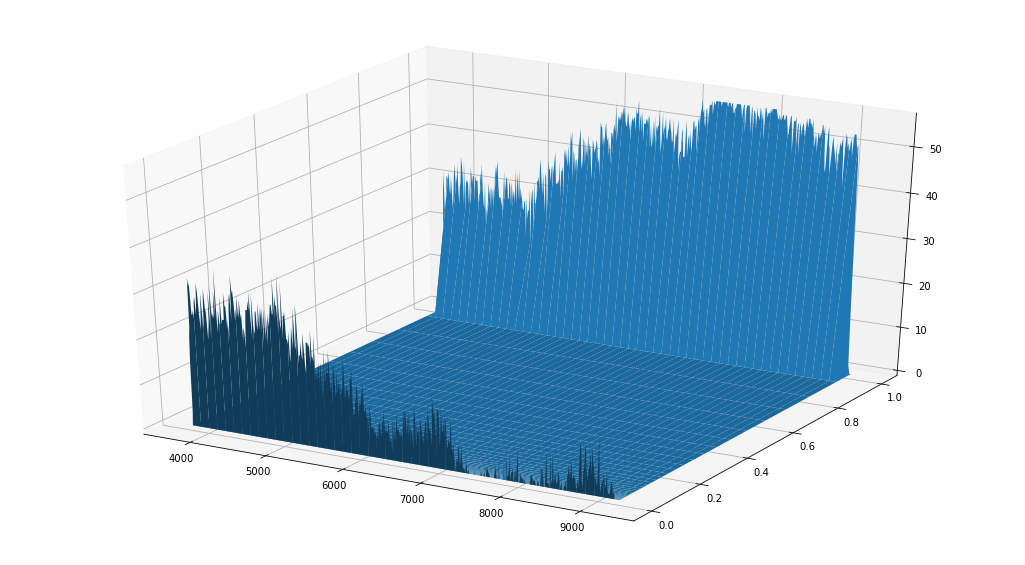

In [75]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111, projection='3d')

x,y = np.meshgrid(wavelength_array,(transmission_array))
surf = ax.plot_surface(x,y,igm_grid.T)
#plt.ylabel(r'log $T^{IGM}_{\lambda,z}$ [lookback time]',fontsize=18)
#plt.xlabel(r'$\lambda_{obs} [\AA]$ ',fontsize=18)
#plt.z
plt.show()


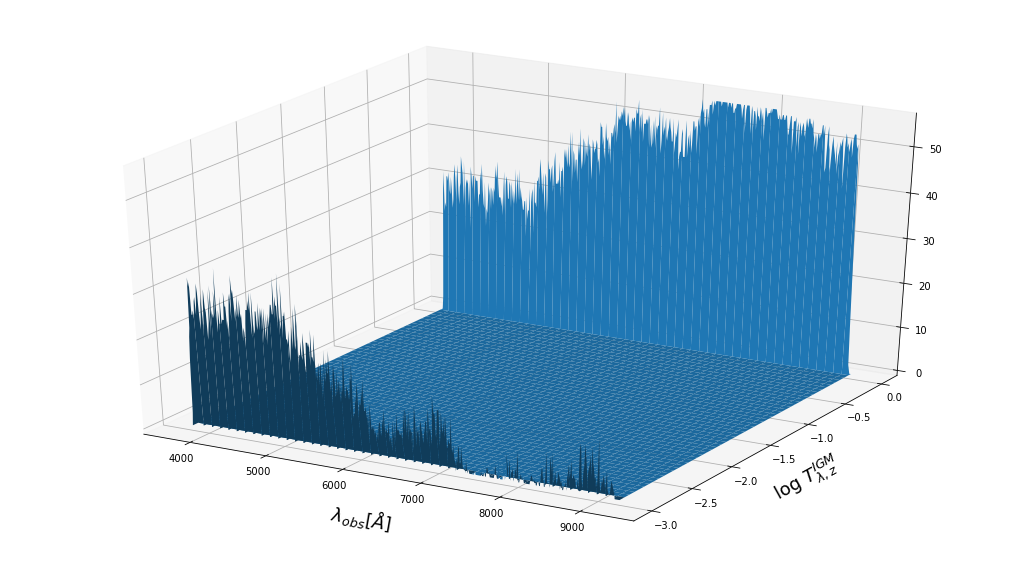

In [76]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (18,10))
ax = fig.add_subplot(111, projection='3d')

x,y = np.meshgrid(wavelength_array,np.log10(transmission_array))
surf = ax.plot_surface(x,y,igm_grid.T)
ax.set_ylabel('\n' +r'log $T^{IGM}_{\lambda,z}$ ',fontsize=18,linespacing=1.8)
ax.set_xlabel('\n' +r'$\lambda_{obs} [\AA]$ ',fontsize=18,linespacing=1.8)
plt.show()
